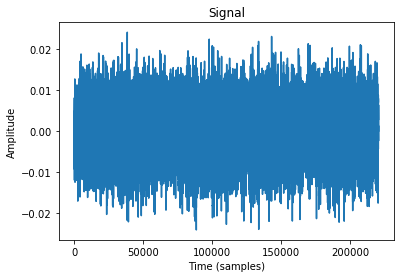

In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
file_normal = librosa.load('0_dB_fan/id_00/normal/00000000.wav')
y, sr = librosa.load('0_dB_fan/id_00/normal/00000001.wav')
plt.plot(y);
plt.title('Signal');
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');

In [2]:
# y1, sr = librosa.load('0_dB_fan/id_00/abnormal/00000001.wav')
ipd.Audio(y, rate=sr)
# ipd.Audio(y2, rate=sr)

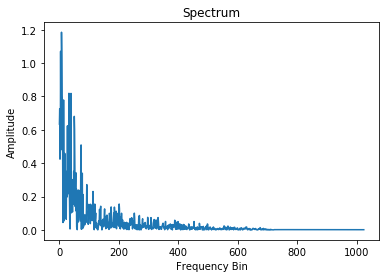

In [3]:
import numpy as np
n_fft = 2048
ft = np.abs(librosa.stft(y[:n_fft], hop_length = n_fft+1))
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');

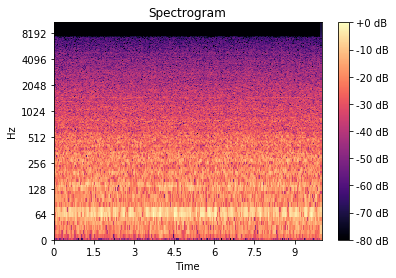

In [4]:
spec = np.abs(librosa.stft(y, hop_length=512))
spec = librosa.amplitude_to_db(spec, ref=np.max)
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');

In [8]:
y.shape

(220500,)

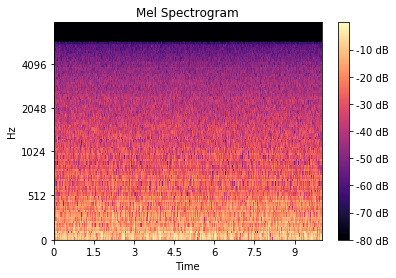

In [6]:
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=512, hop_length=512)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram');
plt.colorbar(format='%+2.0f dB');

In [11]:
#extract MFCC
mfccs = librosa.feature.mfcc(y, n_mfcc = 13, sr=sr)

delta_mfccs = librosa.feature.delta(mfccs)
delta2_mfccs = librosa.feature.delta(mfccs, order=2)
mfccs.shape,delta_mfccs.shape,delta2_mfccs.shape

((13, 431), (13, 431), (13, 431))

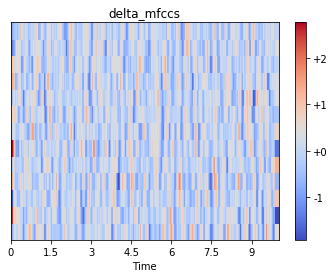

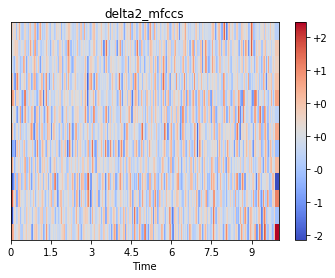

In [20]:
fig, ax = plt.subplots()
# plt.figure(figsize=(25, 10))
librosa.display.specshow(delta_mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
ax.set(title='delta_mfccs')

fig, ax = plt.subplots()
# plt.figure(figsize=(25, 10))
librosa.display.specshow(delta2_mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
ax.set(title='delta2_mfccs')

plt.show()

In [23]:
# concatenate
mfccs_features = np.concatenate((mfccs, delta_mfccs, delta2_mfccs))
mfccs_features.shape

(39, 431)

In [25]:
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
chroma_med = librosa.decompose.nn_filter(chroma,
                                         aggregate=np.median,
                                         metric='cosine')

In [27]:
rec = librosa.segment.recurrence_matrix(chroma, mode='affinity',
                                        metric='cosine', sparse=True)
chroma_nlm = librosa.decompose.nn_filter(chroma, rec=rec,
                                         aggregate=np.average)

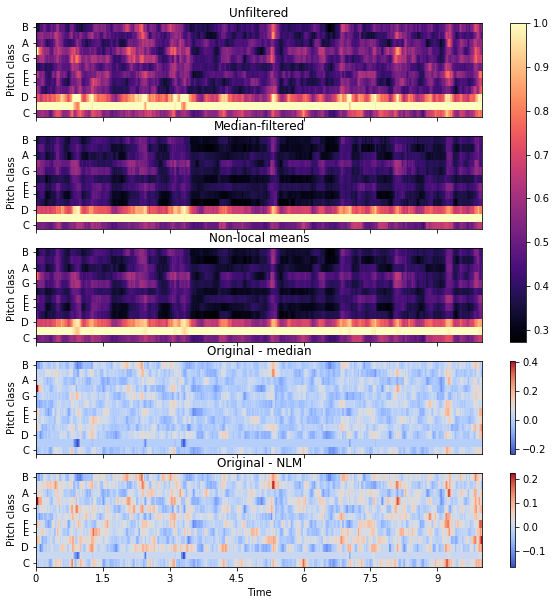

In [28]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=5, sharex=True, sharey=True, figsize=(10, 10))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[0])
ax[0].set(title='Unfiltered')
ax[0].label_outer()
librosa.display.specshow(chroma_med, y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(title='Median-filtered')
ax[1].label_outer()
imgc = librosa.display.specshow(chroma_nlm, y_axis='chroma', x_axis='time', ax=ax[2])
ax[2].set(title='Non-local means')
ax[2].label_outer()
imgr1 = librosa.display.specshow(chroma - chroma_med,
                         y_axis='chroma', x_axis='time', ax=ax[3])
ax[3].set(title='Original - median')
ax[3].label_outer()
imgr2 = librosa.display.specshow(chroma - chroma_nlm,
                         y_axis='chroma', x_axis='time', ax=ax[4])
ax[4].label_outer()
ax[4].set(title='Original - NLM')
fig.colorbar(imgc, ax=ax[:3])
fig.colorbar(imgr1, ax=[ax[3]])
fig.colorbar(imgr2, ax=[ax[4]])